In [3]:
import matplotlib.pyplot as plt
import env.guide_sim as gs
import params

pygame-ce 2.5.0 (SDL 2.30.3, Python 3.10.0)


## 加载导丝仿真环境

In [4]:
p = params.BaseParams()
p.load_from_json("./datas/real_x_ray_harder/config.json")  # 加载环境的配置文件
env = gs.GuidewireEnv()
env.set_params(p)

## 尝试加载导丝环境

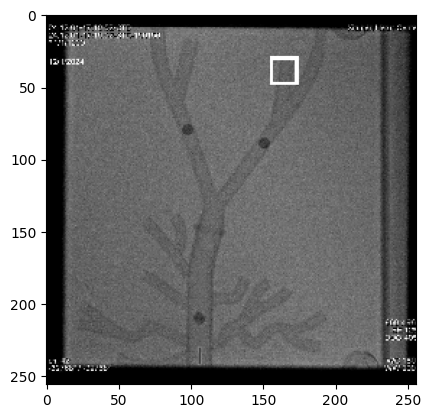

In [5]:
img = env.reset(1)  # 重置环境（每次要开始交互之前必须这么做）（输入代表根据序号开启某个任务）
plt.imshow(img[0], cmap='gray')

## 尝试交互 (往前推进十次)

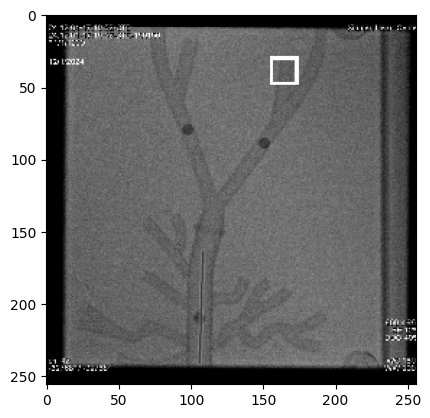

In [16]:
for i in range(10):
    img, reward, is_done, _ = env.step(0)  # 执行一个动作（0: 推进， 1： 撤回， 2，3：旋转）
plt.imshow(img[0], cmap='gray') 

我们的目标是训练一个AI，能够根据图像输入学习到将导丝推送到目标位置（白框）

## 需要尽可能的提升增加泛化性

这个仿真器提供了多种不同的任务，包括不同形状和大小的目标，不同难度的背景，不同难度的导丝路径

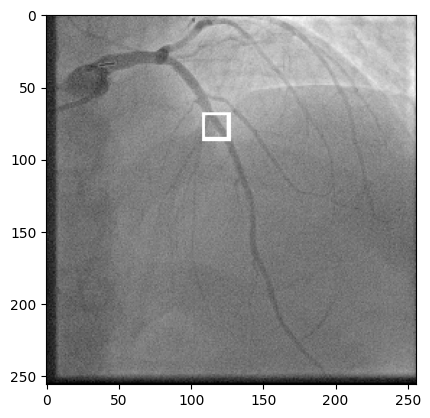

In [8]:
p = params.BaseParams()
p.load_from_json("datas/vivo_multi_branch/config.json")  # 加载环境的配置文件
env = gs.GuidewireEnv()
env.set_params(p)
img = env.reset(0)  # 重置环境（每次要开始交互之前必须这么做）（输入代表根据序号开启某个任务）
plt.imshow(img[0], cmap='gray')

## 尝试使用Qwen2.5VL


In [1]:
from agents.qwen_vl import Agent

In [2]:
openai_api_key = "EMPTY"
openai_api_base = "http://192.168.1.110:1234/v1"
model="qwen2.5-vl-7b-instruct"
agent = Agent(openai_api_key, openai_api_base, model)

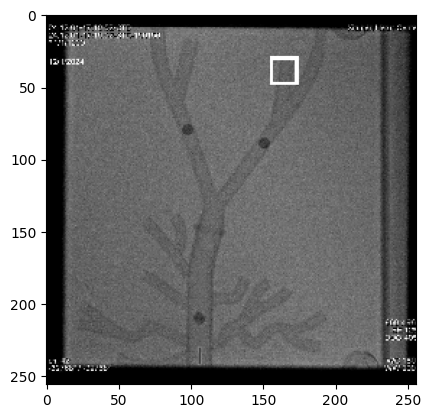

In [17]:
chat_response = agent.chat_with_array(img[0],
                    "将导丝递送到白框位置，你可以推进，后退，左转和右转，请输出你认为的导丝动作选择")  # 与agent对话
plt.imshow(img[0], cmap='gray')

In [18]:
chat_response.choices[0].message.content  # 获取回复内容

'根据图像显示的信息，导丝已经到达了白框的位置。因此，在这种情况下，不需要进行任何操作来移动或调整导丝。导丝已经在目标位置，可以保持不动。\n\n所以，正确的答案是：无需进行任何操作（即“静止”）。'